In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../../../playground-series-s4e3/train.csv')

# Separate features and target
X = data.iloc[:, 1:-7]  # Exclude 'id' and defect type columns
y = data.iloc[:, -7:]   # Only defect types

# Box-Cox transformation
X_transformed = X.apply(lambda x: boxcox1p(x, 0.15))

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train the models and evaluate using ROC and AUC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    for i in range(y.shape[1]):
        fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle='-', label=f'{name} (class {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TypeError: list indices must be integers or slices, not tuple

<Figure size 1000x800 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../../../playground-series-s4e3/train.csv')

# Separate features and target
X = data.iloc[:, 1:-7]  # Exclude 'id' and defect type columns
y = data.iloc[:, -7:]   # Only defect types

# Box-Cox transformation
X_transformed = X.apply(lambda x: boxcox1p(x, 0.15))

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train the models and evaluate using ROC and AUC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    # Collect the predicted probabilities for the positive class
    y_scores = model.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    for i in range(y.shape[1]):
        if hasattr(model, "predict_proba"):
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i, 1])
        else:  # Use decision function for Logistic Regression
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle='-', label=f'{name} (class {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()


TypeError: list indices must be integers or slices, not tuple

<Figure size 1000x800 with 0 Axes>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../../../playground-series-s4e3/train.csv')

# Separate features and target
X = data.iloc[:, 1:-7]  # Exclude 'id' and defect type columns
y = data.iloc[:, -7:]   # Only defect types

# Box-Cox transformation
X_transformed = X.apply(lambda x: boxcox1p(x, 0.15))

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train the models and evaluate using ROC and AUC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    # Collect the predicted probabilities for the positive class
    y_scores = model.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    for i in range(y.shape[1]):
        if hasattr(model, "predict_proba"):
            # Safely access the probabilities of the positive class
            probabilities = y_scores[:, 1] if y_scores.ndim == 2 else y_scores[:, i, 1]
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], probabilities)
        else:  # Use decision function for Logistic Regression
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle='-', label=f'{name} (class {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.legend(loc='lower right')
plt.show()


AttributeError: 'list' object has no attribute 'ndim'

<Figure size 1000x800 with 0 Axes>

AttributeError: 'list' object has no attribute 'shape'

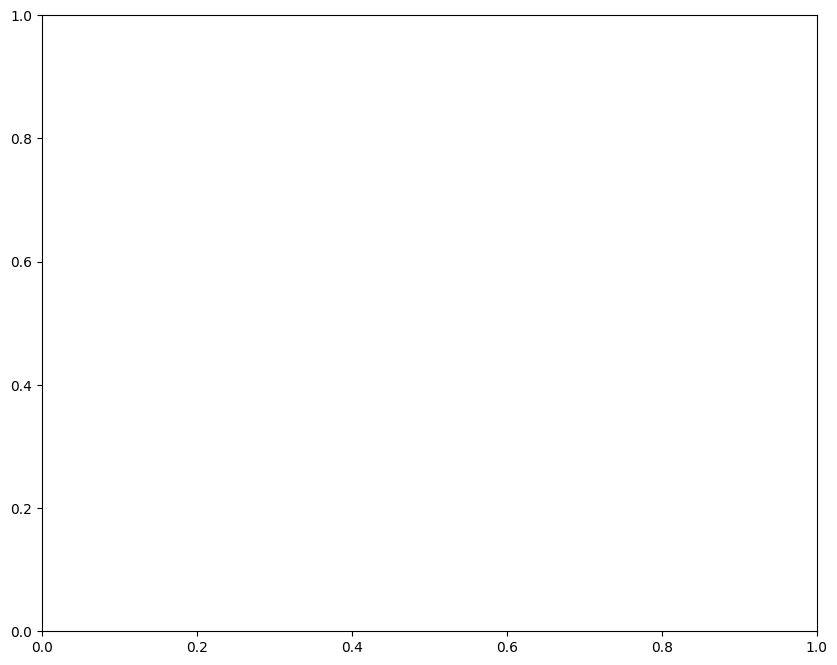

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy.special import boxcox1p
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../../../playground-series-s4e3/train.csv')

# Separate features and targets
X = data.iloc[:, 1:-7]  # Assuming the first column 'id' and the last 7 columns are defect types
y = data.iloc[:, -7:]

# Transform features with boxcox1p
X_transformed = boxcox1p(X, 0.15)

# Scale data with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'ADABoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=300)
}

# Train models and evaluate with ROC curve
fig, ax = plt.subplots(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)

    # Calculate ROC AUC for each class
    for i in range(y_scores.shape[2]):
        fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i, 1])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'{name} class {i} (area = {roc_auc:.2f})')

ax.set_title('ROC Curves by Model and Class')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()


ValueError: y should be a 1d array, got an array of shape (15375, 7) instead.

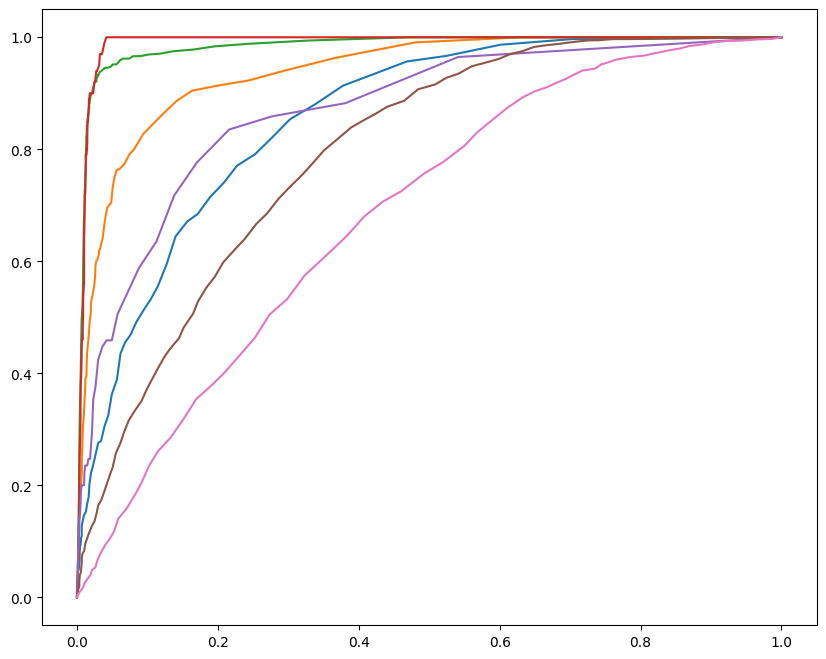

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Load data
data = pd.read_csv('../../../playground-series-s4e3/train.csv')

# Separate features and targets
X = data.iloc[:, 1:-7]  # Assuming the first column 'id' and the last 7 columns are defect types
y = data.iloc[:, -7:]

# Transform features with boxcox1p
X_transformed = boxcox1p(X, 0.15)

# Scale data with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(),
    'ADABoost': AdaBoostClassifier(),
    'LogisticRegression': OneVsRestClassifier(LogisticRegression(max_iter=300))
}

# Train models and evaluate with ROC curve
fig, ax = plt.subplots(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)
    
    # Calculate ROC AUC for each class
    for i in range(y_test.shape[1]):
        if isinstance(y_scores, list):  # Handling different output formats
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[i][:, 1])
        else:
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i, 1])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'{name} class {i} (area = {roc_auc:.2f})')

ax.set_title('ROC Curves by Model and Class')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()


AttributeError: 'list' object has no attribute 'shape'

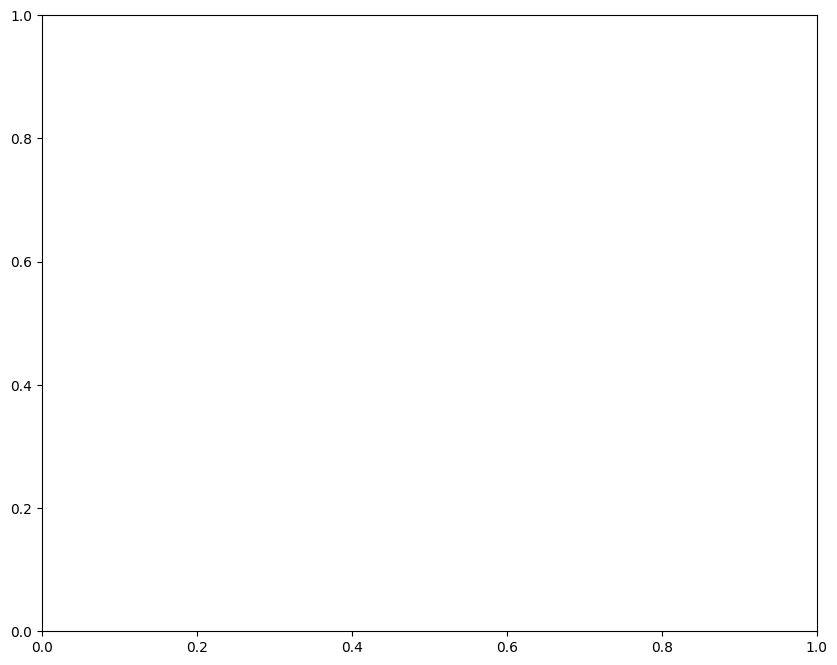

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Load data
data = pd.read_csv('../../../playground-series-s4e3/train.csv')

# Separate features and targets
X = data.iloc[:, 1:-7]  # Exclude 'id' and defect type columns
y = data.iloc[:, -7:]   # Only defect types

# Transform features with boxcox1p
X_transformed = boxcox1p(X, 0.15)

# Scale data with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models including OneVsRest strategy for AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'ADABoost': OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))),
    'LogisticRegression': OneVsRestClassifier(LogisticRegression(max_iter=1000))
}

# Train models and evaluate with ROC curve
fig, ax = plt.subplots(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)
    
    # Calculate ROC AUC for each class
    for i in range(y_scores.shape[1]):
        fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'{name} class {i} (area = {roc_auc:.2f})')

ax.set_title('ROC Curves by Model and Class')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.show()
